## Table of Contents
<ul class="toc-item">
<li><span><i class="fa fa-fw"></i><a href="#Background" data-toc-modified-id="Background"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li>
<li>
   <span><i class="fa fa-fw "></i><a href="#About-the-Dataset" data-toc-modified-id="About-the-Dataset"><span class="toc-item-num">2&nbsp;&nbsp;</span>About the Dataset</a></span>
   <ul class="toc-item">
      <li><span><i class="fa fa-fw"></i><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li>
      <li><span><i class="fa fa-fw"></i><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train-Test Split</a></span></li>
      <li><span><i class="fa fa-fw"></i><a href="#Upsampling-the-dataset" data-toc-modified-id="Upsampling-the-dataset"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Upsampling the dataset</a></span></li>
   </ul>
<li>
   <span><i class="fa fa-fw "></i><a href="#Building-the-model" data-toc-modified-id="Building the model"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building the model</a></span>
   <ul class="toc-item">
      <li><span><i class="fa fa-fw"></i><a href="#Key-model-outputs" data-toc-modified-id="Key-model-outputs"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Key model outputs</a></span></li>
   </ul>
<li><span><i class="fa fa-fw"></i><a href="#Model-Interpretability" data-toc-modified-id="Model-Interpretability"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Interpretability</a></span></li>
<li>
   <span><i class="fa fa-fw "></i><a href="#Comparisons-XAI" data-toc-modified-id="Comparisons-XAI"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparisons XAI</a></span>
   <ul class="toc-item">
      <li><span><i class="fa fa-fw"></i><a href="#PDP-vs-ALE" data-toc-modified-id="PDP-vs-ALE"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PDP vs ALE</a></span></li>
      <ul class="toc-item">
         <li><span><i class="fa fa-fw"></i><a href="#Understanding-these-methods" data-toc-modified-id="Understanding-these-methods"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Understanding these methods</a></span></li>
         <li><span><i class="fa fa-fw"></i><a href="#Getting-into-examples-and-comparing" data-toc-modified-id="Getting-into-examples-and-comparing"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Getting into examples and comparing</a></span></li>
         <li><span><i class="fa fa-fw"></i><a href="#PDP-vs-ALE-Plot-using-Dalex-Explainer" data-toc-modified-id="PDP-vs-ALE-Plot-using-Dalex-Explainer"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>PDP vs ALE Plot using Dalex Explainer</a></span></li>
         <li><span><i class="fa fa-fw"></i><a href="#Summary-Comparison" data-toc-modified-id="Summary-Comparison"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Summary Comparison</a></span></li>
      </ul>
      <li><span><i class="fa fa-fw"></i><a href="#SHAP-vs-Breakdown" data-toc-modified-id="SHAP-vs-Breakdown"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SHAP vs Breakdown</a></span></li>
      <ul class="toc-item">
         <li><span><i class="fa fa-fw"></i><a href="#Understanding-these-Methods" data-toc-modified-id="Understanding-these-methods"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Understanding these methods</a></span></li>
         <li><span><i class="fa fa-fw"></i><a href="#Getting-into-Examples-and-comparing" data-toc-modified-id="Getting-into-examples-and-comparing"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Getting into examples and comparing</a></span></li>
         <li><span><i class="fa fa-fw"></i><a href="#Summary-comparison" data-toc-modified-id="Summary-Comparison"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Summary Comparison</a></span></li>
      </ul>
   </ul>
<li><span><i class="fa fa-fw"></i><a href="#Conclusion" data-toc-modified-id="Conclusion"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li>

# Background

In this notebook, I've conducted a comparative case study to examine the two most common approaches to global explanation: accumulated local effects and partial dependence and two local explanation strategies SHAP Waterfall Plots and Breakdown Interaction Plots. These methods each provide distinctive insights that are essential to comprehending our models.

<font size = 5  color = '#008B8B'> <b>XAI why?</b> </font>
-  ML/AI models are getting more complex and challenging and hence the need to interpret and explain is even more
-  XAI is a regulartory requirement and a key transparency pillar for most of the industries deploying AI


<img src="https://www.darpa.mil/ddm_gallery/xai-figure1-inline-graphic.png" align = 'left' width = 500 length = 500>

<br clear="left"/>
    
*A simple [infographic](https://www.darpa.mil/ddm_gallery/xai-figure1-inline-graphic.png) above shows the flow of AI to Questions*

<font size = 5  color = '#008B8B'> <b>What does XAI answer?</b> </font>
- Why did the AI system make a specific prediction or decision?
- Why didn‚Äôt the AI system do something else?
- When do AI systems give enough confidence in the decision that you can trust it, and how can the AI system correct errors that arise?
    
<img src="https://miro.medium.com/max/1100/1*jQXEEEOWuSGJT9KwD8DEhA.png" align = 'left' width = 500 length = 500> 
<br clear="left"/>

*A simple [infographic](https://www.researchgate.net/profile/Jordi-Vallverdu/publication/339079867/figure/fig1/AS:855646786297857@1581013499668/Explainability-in-deep-learning-DL.ppm) above illustrates some of state-of-the-art techniques in the accuracy-interpretability trade-off map*


 <font size = 5 color = '#008B8B'> <b>Questions on XAI</b> </font>
 1. Are the methods to interpret model patterns and decisions used by us the best available so far ? E.g. [SHAP](https://shap.readthedocs.io/en/latest/index.html) or [PDP](https://christophm.github.io/interpretable-ml-book/pdp.html)
 
 2. What are the other new/alternative methods that are worth exploring and considered as the new cutting edge from the academics?
 

<font size = 5 color = '#008B8B'> <b>XAI family of packages out there</b> </font>

Below is a table which gives an overview of the whole landscape of frameworks/packages on XAI that have come up in Python/R. This includes big brands such as IBM, google, Microsoft etc

| Name                                                                                                                                                                                                                                                                                                                   | Short Description                                                                                                                                                                                                                                | Developed by                                                    | Explainable Type                                                                                           | Supported ML Models                                                                                                                                                      | Available In                                 | 
| ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------- | 
| <figure><center><img src="https://miro.medium.com/max/602/1*d3R7xA7KH9mi-nrmp0t2UA.png" width="120" height="120"><a href="https://shap.readthedocs.io/en/latest/index.html">SHAP</a></center></figure>                                                                                                                          | <p style='text-align: left;'> SHAP (SHapley Additive exPlanations) </p>                                                                                                                                                                          | <p style='text-align: left;'> Scott Lundberg and Su-In Lee </p> | <p style='text-align: left;'> Local & Global </p>                                                          | <p style='text-align: left;'> TreeExplainer, DeepExplainer and KernelExplainer </p>                                                                                      | <p style='text-align: left;'> Python,R </p>  | 
| <figure><center><img src="https://www.data-imaginist.com/assets/images/lime_logo_small.jpg" width="120" height="120"><a href="https://lime-ml.readthedocs.io/en/latest">LIME</a></center></figure>                                                                                                                              | <p style='text-align: left;'> LIME, the acronym for local interpretable model-agnostic explanations </p>                                                                                                                                         | <p style='text-align: left;'> Marco Ribeiro </p>                | <p style='text-align: left;'> Local </p>                                                                   | <p style='text-align: left;'> tabular models, NLP models, and image classifiers</p>                                                                                      | <p style='text-align: left;'> Python,R </p>  | 
| <figure><center><img src="https://dalex.drwhy.ai/misc/dalex_even.png" width="120" height="120"><a href="https://dalex.drwhy.ai/">Dalex </a></center></figure>                                                                                                                                            | <p style='text-align: left;'>Dalex is a comprehensive XAI framework with multiple algorithms </p>                                                                                                                                                | <p style='text-align: left;'> dalex.drwhy.ai </p>               | <p style='text-align: left;'> Local & Global <br>(SHAP, Break Down, PDP, ALE)</p>                                                 | <p style='text-align: left;'> Scikit-Learn,catboost, xgboost, keras, h2o </p>                                                                                | <p style='text-align: left;'> Python,R </p>  | 
| <figure><center><img src="https://interpret.ml/images/interpretml-meta-image.jpg" width="80" height="80"><a href="https://interpret.ml/docs/getting-started">InterpretML</a></center></figure>                                                                                                                                | <p style='text-align: left;'> InterpretML is an new open-source Python package introducing glassbox methods. One more package by microsoft - <a href="https://learn.microsoft.com/en-us/azure/machine-learning/how-to-machine-learning-interpretability">Azure .interpret</a></p>   | <p style='text-align: left;'> Microsoft </p>     | <p style='text-align: left;'>Glassbox - Global & Local, Blackbox - Local </p>          | <p style='text-align: left;'> Glassbox - Scikit Learn, blackbox - models compatible with LIME & Kernel SHAP </p>                                                         | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://www.tensorflow.org/static/site-assets/images/marketing/cards/tile_tool_what_if.jpg" width="120" height="120"><a href="https://pair-code.github.io/what-if-tool/"> What-If tool </a></center></figure>                                                                                        | <p style='text-align: left;'> What-If tool is a visualization tool that is designed to interactively probe the machine learning models. </p>                                                                                                     | <p style='text-align: left;'> Google </p>                        | <p style='text-align: left;'> Local & Global </p>                                                          | <p style='text-align: left;'> XGBoost , Scikit-Learn, TensorFlow </p>                                                                                                    | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://www.akira.ai/hubfs/Imported_Blog_Media/eli5-python-library-akira-ai.png" width="120" height="120"><a href="https://eli5.readthedocs.io/en/latest/"> ELI5 </a></center></figure>                                                                                                               | <p style='text-align: left;'> ELI5 uses Lime and other permutation importance methods </p>                                                                                                                                                       | <p style='text-align: left;'> MIT </p>                          | <p style='text-align: left;'> Local & Global </p>                                                          | <p style='text-align: left;'> scikit-learn, XGBoost, LightGBM, CatBoost, lightning, sklearn-crfsuite, Keras </p>                                                         | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://www.bloorresearch.com/wp-content/uploads/2020/07/YELLOWBRICK-logo-300-x-470px--x.png" width="80" height="80"><a href="https://www.scikit-yb.org/en/latest/"> Yellowbrick </a></center></figure>                                                                                             | <p style='text-align: left;'> The Yellowbrick library is based on the scikit-learn and matplotlib libraries. </p>                                                                                                                                | <p style='text-align: left;'> Ankit Dhir and Rob Kingyens </p>  | <p style='text-align: left;'> Global </p>                                                                  | <p style='text-align: left;'> scikit-learn </p>                                                                                                                          | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://raw.githubusercontent.com/SeldonIO/alibi/master/doc/source/_static/Alibi_Explain_Logo_rgb.png" width="120" height="120"><a href="https://github.com/SeldonIO/alibi#model-explanations"> Alibi Explain </a></center></figure>                                                                        | <p style='text-align: left;'> Cover both the model-agnostic (black-box) and model-specific (white-box) setting </p>                                                                                                                              | <p style='text-align: left;'> Janis Klaise </p>           | <p style='text-align: left;'> Local & Global <br>(SHAP, PDP, ALE) </p>                                     | <p style='text-align: left;'> scikit-learn, XGBoost, LightGBM, CatBoost, tensorflow, Keras </p>                                                                          | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://aix360.mybluemix.net/static/images/logo.png" width="120" height="120"><a href="https://aix360.mybluemix.net/">AI Explainability 360 (AIX360)</a></center></figure>                                                                                                                            | <p style='text-align: left;'> It includes algorithms that span the different dimensions of ways of explaining along with proxy explainability metrics </p>                                                                                       | <p style='text-align: left;'> IBM Research </p>                 | <p style='text-align: left;'> Local & Global <br>(SHAP) </p>                                               | <p style='text-align: left;'> scikit-learn,Pytorch,Tensorflow  </p>                                                                                                      | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://oracle.github.io/Skater/_static/skater-logo.svg" width="120" height="120"><a href="https://oracle.github.io/Skater/overview.html">Skater</a></center></figure>                                                                                                                                | <p style='text-align: left;'> Skater is a unified framework to enable Model Interpretation for all forms of model </p>                                                                                                                           | <p style='text-align: left;'> Aaron Kramer</p>                  | <p style='text-align: left;'> Local & Global <br>(PDP) </p>                                                | <p style='text-align: left;'> scikit-learn,tensorflow,keras </p>                                                                                                         | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://venturebeat.com/wp-content/uploads/2019/03/activation_atlas_zoomed_out.png?fit=780%2C372&strip=all" width="120" height="120"><a href="https://ai.googleblog.com/2019/03/exploring-neural-networks.html">Activation Atlases</a></center></figure>                                              | <p style='text-align: left;'> Visualize how neural networks interact with each other. Other python packages for NN - <a href="https://github.com/kundajelab/deeplift">DeepLIFT</a> <a href="https://github.com/tensorflow/lucid">Lucid </a> </p> | <p style='text-align: left;'> OpenAI and Google </p>            | <p style='text-align: left;'> Local & Global </p>                                                          | <p style='text-align: left;'> tensorflow </p>                                                                                                                            | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://shapash.readthedocs.io/en/latest/_images/shapash-resize.png" width="120" height="120"><a href="https://shapash.readthedocs.io/en/latest/">Shapash</a></center></figure>                                                                                                                       | <p style='text-align: left;'> Visualization based ml interpretor compatible with Shap & Lime</p>                                                                                                                                                 | <p style='text-align: left;'> MAIF Data Scientists </p>         | <p style='text-align: left;'> Local & Global <br>(SHAP, PDP) </p>                                          | <p style='text-align: left;'> sklearn, lightgbm, catboost, xgboost</p>                                                                                                   | <p style='text-align: left;'> Python </p>    | 
| <figure><center><img src="https://explainerdashboard.readthedocs.io/en/latest/_images/screenshot.gif"  width="80" height="80"><a href="https://explainerdashboard.readthedocs.io/en/latest/index.html">ExplainerDashboard</a></center></figure>                                                                               | <p style='text-align: left;'> Interactive dashboards for analyzing and explaining the predictions </p>                                                                                                                                           | <p style='text-align: left;'> Oege Dijk </p>                    | <p style='text-align: left;'> Local & Global <br>(SHAP, PDP) </p>                                          | <p style='text-align: left;'> xgboost, catboost and lightgbm, sklearn</p>                                                                                                | <p style='text-align: left;'> Python </p>    | 


[back](#Table-of-Contents)

<hr color='#008B8B'>

In [1]:
#Import libraries
import pandas as pd
import numpy as np 
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

import importlib
import utils
importlib.reload(utils)

import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools
import matplotlib.pyplot as plt
%matplotlib inline

import shap
import dalex as dx
import shapash

import summarytools as st
from IPython.display import HTML
from summarytools import dfSummary, collapsible, tabset

import warnings
warnings.filterwarnings('ignore')
import pickle

<hr color='#008B8B'>

# About the Dataset


The [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?datasetId=1120859&language=Python) is available on Kaggle. This dataset provides information on individuals and their potential risk of stroke.

Attributes
`id`: unique identifier for each individual <br>
`gender`: gender of the individual (male or female or other)<br>
`age`: age of the individual<br>
`hypertension`: presence of hypertension (1 = yes, 0 = no)<br>
`heart_disease`: presence of heart disease (1 = yes, 0 = no)<br>
`ever_married`: marital status of the individual (yes or no)<br>
`work_type`: type of work the individual is involved in, "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
`residence_type`: type of residence the individual lives in, "Rural" or "Urban"<br>
`avg_glucose_level`: average glucose level of the individual<br>
`bmi: body mass` body mass index of the individual<br>
`smoking_status`: smoking status of the individual, "formerly smoked", "never smoked", "smokes" or "Unknown"<br>
`stroke`: whether the individual has had a stroke (1 = yes, 0 = no)<br>


<div class="alert alert-block alert-info">
<b>Note:  </b>"Unknown" in smoking_status means that the information is unavailable for this patient</div>

In [2]:
#Read stroke prediction dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
#drop column id 
df.drop(['id'], axis=1,inplace=True)
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

## Data Preprocessing 

In this section, simple data preprocessing will be performed to train the model. Since the focus of this notebook is to understand the inner workings of popular XAI techniques, in-depth visualization and preprocessing will not be performed.

In [3]:
#display a brief insight of dataset
utils.df_summary(df)

Variable     Type Missing Values Unique Values  \
0              gender   object              0             3   
1                 age  float64              0           104   
2        hypertension    int64              0             2   
3       heart_disease    int64              0             2   
4        ever_married   object              0             2   
5           work_type   object              0             5   
6      Residence_type   object              0             2   
7   avg_glucose_level  float64              0          3979   
8                 bmi  float64            201           418   
9      smoking_status   object              0             4   
10             stroke    int64              0             2   

                               Distinct Unique Values  
0                               [Male, Female, Other]  
1   [67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....  
2                                              [0, 1]  
3                                              [1, 0]  
4                                           [Yes, No]  
5   [Private, Self-employed, Govt_job, children, N...  
6                                      [Urban, Rural]  
7   [228.69, 202.21, 105.92, 171.23, 174.12, 186.2...  
8   [36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8...  
9    [formerly smoked, never smoked, smokes, Unknown]  
10                                             [1, 0]

<b>Initial Overview of the Dataset</b>

A simple function was used to gain insight into the dataset, including the data type, missing values, unique values, and a preview of the dataset. The following findings were made:

- There are 201 missing values for BMI.
- The dataset contains both categorical and numerical features.
- The categorical features include: gender, ever_married, work_type, residence_type, and smoking_status.
- The binary numerical features include: hypertension, heart_disease, and stroke.
- The continuous numerical features include: age, avg_glucose_level, and bmi.

In [4]:
#create a sunburst chart to view the distribution of data 
df_stroke= df.groupby(['stroke', 'gender']).agg({'gender': 'count'}).rename(columns = {'gender': 'count'}).reset_index()

fig = px.sunburst(df_stroke, path = ['stroke', 'gender'], values = 'count', color_discrete_sequence=["green", "red"], height=500, width=500)

fig.update_layout(annotations = [dict(text = 'Distribution of stroke by gender', 
                                      x = 0.5, y = 1.1, font_size = 20, showarrow = False, 
                                      font_color = '#008B8B')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

<b> Distribution of target variable </b>

From the distribution, it is evident that only 5 out of every 100 people in our sample data have had strokes. This data distribution is highly unbalanced and has a null accuracy score of 95%. This means that even a basic model that makes random predictions of stroke can reach high accuracy. Therefore, when modeling and training the data, either oversampling or undersampling should be performed to achieve the best results.

In [5]:
#Missing value imputation logic is referenced from https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [6]:
#categorical feature transformation using label Encoding
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender']) # Female = 0, Male =1
df['ever_married']=le.fit_transform(df['ever_married']) # Yes =1, No=0
df['Residence_type']=le.fit_transform(df['Residence_type']) # Urban =1, Rural =0
df['work_type']=le.fit_transform(df['work_type']) 

In [7]:
#Summary post feature engineering 
utils.df_summary(df)

Variable     Type Missing Values Unique Values  \
0              gender    int64              0             3   
1                 age  float64              0           104   
2        hypertension    int64              0             2   
3       heart_disease    int64              0             2   
4        ever_married    int64              0             2   
5           work_type    int64              0             5   
6      Residence_type    int64              0             2   
7   avg_glucose_level  float64              0          3979   
8                 bmi  float64              0           528   
9      smoking_status   object              0             4   
10             stroke    int64              0             2   

                               Distinct Unique Values  
0                                           [1, 0, 2]  
1   [67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69....  
2                                              [0, 1]  
3                                              [1, 0]  
4                                              [1, 0]  
5                                     [2, 3, 0, 4, 1]  
6                                              [1, 0]  
7   [228.69, 202.21, 105.92, 171.23, 174.12, 186.2...  
8   [36.6, 29.879487179487185, 32.5, 34.4, 24.0, 2...  
9    [formerly smoked, never smoked, smokes, Unknown]  
10                                             [1, 0]

## Train-Test Split

In [8]:
#train test split
X = df.drop(columns=['stroke','smoking_status','ever_married','Residence_type'])
y = df[['stroke']]

#80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(5110, 7), (4088, 7), (1022, 7)


## Upsampling the dataset

In [9]:
oversample = SMOTE()
X_train_sample, y_train_sample = oversample.fit_resample(X_train, y_train['stroke'])

In [10]:
#sampled data
y_train_sample.value_counts()

0    3901
1    3901
Name: stroke, dtype: int64

[back](#Table-of-Contents)

<hr color='#008B8B'>

# Building the model


For the demo purpose, the LightGBM algorithm is used to train the model. The size of the dataset is small, and other basic models such as Random Forest could have also been used. 

<font size = 5 color = '#008B8B'> <b>Light GBM and package details</b> </font>

For this demo, we have used [`LightGBM classifier`](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html). 

1. LightGBM is a fast, distributed, high performance **gradient boosting framework** based on **decision tree** algorithms. 
2. Handle the large size of data and takes lower memory to run and focuses on accuracy of results. 
3. Faster training speed and accuracy resulting from it being a **histogram-based algorithm** that performs bucketing of values.
4. It **grows tree vertically**(leaf-wise) while other algorithm grows trees horizontally(level-wise).
5. It will **choose the leaf with max delta loss to grow**. 
    When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

Below diagrams explain the implementation of LightGBM and other boosting algorithms.

<div style="float: left;">
<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194110/leaf.png" width = 450 length = 450 ><center>How other boosting algorithm works</center>
</div>

<br>


<div style="float: left;">
<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png" width = 450 length = 450 ><center>How other boosting algorithm works</center>
</div>




## Key model outputs

In [11]:
#fit lgbm and save using pickle 
classifier = LGBMClassifier(random_state=42,learning_rate = 0.01,
                             max_depth= 4,
                             n_estimators= 300)
utils.fit_model(classifier,'LGBM Classifier','trained_classifier.sav',X_train_sample,y_train_sample)

LGBM Classifier
Start Time: 2023-02-03 14:20:44.877766
End Time: 2023-02-03 14:20:45.213249
Total time taken:0:00:00.335483


In [12]:
f1 = utils.c_matrix('trained_classifier.sav','Confusion Matrix',y_test,X_test)
f2 = utils.plot_auc('trained_classifier.sav',y_test,X_test)
f3 = utils.feature_importance('trained_classifier.sav',"Top 20 Important Features",X,X.columns)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test['stroke'], y_test['predicted'])

array([[750, 210],
       [ 20,  42]])

In [14]:
html1 = (f1.to_html(include_plotlyjs='require', full_html=False))
html2 = (f2.to_html(include_plotlyjs='require', full_html=False))
html3 = (f3.to_html(include_plotlyjs='require', full_html=False))
tabset({
    'Confusion matrix': html1,
    'Area Under the Curve(AUC)': html2,
    'Feature Importance': html3
})


<font size = 4 color = '#008B8B'> <b>Key Insights </b> </font>

The model trained with LightGBM was able to predict 42 out of 62 stroke-prone individuals with an AUC-ROC score of 0.83. It is important to conduct further analysis to ensure that these results are not due to chance or any biases introduced during the modeling stage.

Based on the current dataset, the most important features for predicting stroke-prone individuals were found to be age, BMI, and glucose level. These findings suggest that these factors should be closely monitored and considered when assessing the risk of stroke.

[back](#Table-of-Contents)

<hr color='#008B8B'>

# Model Interpretability

**Interpretabilit**y is the degree to which a human can understand the cause of a decision. So, the **model interpretability** is the degree to which a human can consistently predict the model‚Äôs result.

<font size = 4 color = '#008B8B'> <b>Key terminology in XAI </b> </font>
  - **Globally** : This is the overall explanation of model behavior. It shows us a big picture view of the model, and **how features in the data collectively affect the result**.
  - **Locally** : This tells us about each instance and feature in the data individually (kind of like explaining observations seen at certain points in the model), and **how features individually affect the result**.
  - **Model Agnostic** : It provide easy-to-understand explanations of predictions made by any ML model.  
  - **Model Specific** : These are designed to interpret predictions generated by a specific model, such as a neural network

<div style="float: left;">
<img src = "https://wires.onlinelibrary.wiley.com/cms/asset/60dc00c2-0acb-4f26-868b-7488892dc92e/widm1379-toc-0001-m.jpg" width = 700 length = 700 >
</div>
<br clear="left"/>

*A simple [infographic](https://wires.onlinelibrary.wiley.com/doi/10.1002/widm.1379) above shows Global vs local explanation*

[back](#Table-of-Contents)

<hr color='#008B8B'>

# Comparisons XAI 


## PDP vs ALE

### Understanding these methods

####  PDP

In [15]:
pdp_theory_md = """ 
<font size = 4  color = '#008B8B'> <b>What is PDP?</b></font>
<ul>
   <li>The partial dependence plot (short PDP) is a global, model-agnostic interpretation method introduced by Friedman in 2001.</li>
   <li>Shows the marginal effect one or two features have on the predicted outcome.</li>
   <li>Shows whether the relationship between the target and a feature is linear, monotonic or more complex</li>
   <li>How it is derived? </li>
   <ul>
       <li>Select a feature. </li>
       <li>Define the grid values.</li>
       <li>Per grid value: </li>
       <ul>
           <li>Replace feature with grid value</li>
           <li>Average the predictions</li>
      </ul>
      <li>Draw the curve.</li>
   </ul>
</ul>

<img align="left" src="https://blogs.sas.com/content/subconsciousmusings/files/2018/06/blackboxmodels.png" width = 600 length = 600>
<br clear="left"/>

<i><a href="https://blogs.sas.com/content/subconsciousmusings/files/2018/06/blackboxmodels.png">infographic</a> above illustrate the relationship between features and prediction </i>
""" 

In [16]:
pdp_eg_md = """ 
<font size = 4  color = '#008B8B'> <b>How Partial Dependence is calculated?</b></font>
<br>
<b>Below series of images can help us understand how PD is calculated.</b>

<br>
<br>

<img align="left" src="xai_img/PD_STEP.png" width = 450 length = 450>
<br clear="left"/>

<i>Infographic above shows steps to plot PD </i>

<br>
<br>

<img align="left" src="xai_img/PD_DATA.png" width = 450 length = 450>
<br clear="left"/>

<i>Fig above illustrate the data used to calculate PD</i>
<br>
<br>

<img align="left" src="xai_img/PD_EG.png" width = 450 length = 450>
<br clear="left"/>

<i>Fig above shows average prediction calculated per grid value</i>

<br>
<br>
   
<img align="left" src="xai_img/PD_GRAPH.png" width = 450 length = 450>
<br clear="left"/>

<i>Fig above shows the PD plot for feature AGE</i>
""" 

In [17]:
#checkout both the tabs
tabset({
    'Theory': pdp_theory_md,
    'Example': pdp_eg_md,
})

#### ALE

In [18]:
ale_theory_md = """ 
<font size = 4  color = '#008B8B'> <b>What is ALE?</b></font>
<ul>
   <li>Accumulated Local Effects(ALE) is also a global, model-agnostic interpretation method proposed by Apley in 2018.</li>
   <li>Calculates the differences in predictions instead of averages. Using ‚Äúdifferences‚Äù instead of ‚Äúaverages‚Äù allows it to block the effect of correlated features.</li>
   <li>ALE plots are a faster and unbiased alternative to partial dependence plots (PDPs)</li>
   <li>To estimate local effects, we divide the feature into many intervals and compute the differences in the predictions.  
   <li>How it is derived? </li>
   <ul>
       <li>Select a feature. </li>
       <li>Define interval/ neighbor regions</li>
       <li>Per interval (local neighborhood) : </li>
       <ul>
           <li>Replace feature with lower limit value and calculate predictions</li>
           <li>Replace feature with upper limit value and calculate predictions</li>
           <li>Average the difference in predictions between a and b</li>
           <li>Accumulate the effects across all intervals so that effect of internal X3 is a accumulated effect of X1,X2 and X3</li>
      </ul>
      <li>Finally, the accumulated feature effects at each interval is centered, such that the mean effect is zero.</li>
      <li>Draw the curve</li>
   </ul>
</ul>

""" 

In [19]:
ale_eg_md = """ 
<font size = 4  color = '#008B8B'> <b>How Accumulated Local effect is calculated?</b></font>
<br>
<b>Below series of images can help us understand how ALE is calculated.</b>

<br>
<br>

<img align="left" src="xai_img/ALE_STEP.png" width = 650 length = 550>
<br clear="left"/>

<i>Infographic above shows steps to plot ALE </i>

<br>
<br>

<img align="left" src="xai_img/ALE_DATA.png" width = 450 length = 400>
<br clear="left"/>

<i>Fig above illustrate the data used to calculate ALE</i>
<br>
<br>

<img align="left" src="xai_img/ALE_EG.png" width = 550 length = 550>
<br clear="left"/>

<i>Fig above shows estimated calculation of ALE</i>

<br>
<br>

<img align="left" src="xai_img/ALE_FOR.png" width = 450 length = 450>
<br clear="left"/>


<br>
<br>
   
<img align="left" src="xai_img/ALE_GRAPH.png" width = 500 length = 500>
<br clear="left"/>

<i>Fig above shows the ALE plot for feature AGE</i>

<br>
<br>
   
<img align="left" src="xai_img/ALE_NOTE.png" width = 700 length = 500>
<br clear="left"/>

<i>Important notes for ALE</i>
""" 

In [20]:
tabset({
    'Theory': ale_theory_md,
    'Example': ale_eg_md,
})

### Getting into examples and comparing
I have utilized the [Shapash](https://shapash.readthedocs.io/en/latest/tutorials/plot/tuto-plot02-contribution_plot.html) package to create Partial Dependence Plots and the [Dalex](https://ema.drwhy.ai/accumulatedLocalProfiles.html) package to generate insightful Accumulated Local Effects Plots.

In [21]:
#load model to create SHAP and breakdown plots
model = pickle.load(open('trained_classifier.sav', 'rb'))

In [22]:
# create the smart explainer 
from shapash import SmartExplainer
xpl = SmartExplainer( 
  model=model,
)

xpl.compile(
    x=X_test,   
)

In [23]:
#PDP plot for age 
xpl.plot.contribution_plot(col="age")

In [24]:
#create a break down explainer for the model
print('\033[1m'+ '\033[4m' + " Dalex Explainer " +'\033[0m')
start_time = datetime.now()
print("Start Time: {}" .format(start_time))

exp = dx.Explainer(model,X,y['stroke']) 

end_time = datetime.now() 
print("End Time: {}" .format(end_time))
print('Total time taken:' + '\033[1m' + str(end_time - start_time) + '\033[0m')

 Dalex Explainer 
Start Time: 2023-02-03 14:20:47.077817
Preparation of a new explainer is initiated

  -> data              : 5110 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5110 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fa7228be040> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0269, mean = 0.279, max = 0.891
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.889, mean = -0.23, max = 0.951
  -> model_info        : package lightgbm

A new explainer has been created!
End Time: 2023-02-03 14:20:47.255304
Total time taken:0:00:00.177487


In [25]:
#ALE plot for age 
exp.model_profile(type = 'accumulated',
          variables = ["age"],
                 verbose=False).plot()

** By default, the profile is based on 100 randomly selected observations.

<b>Key Insights </b>

We can see that the probability of having a stroke increases as age increases. This means that older people have a higher probability of having a stroke compared to younger people. This information can be used by medical professionals to identify the risk of stroke in different age groups and develop preventive measures accordingly.   

### PDP vs ALE Plot using Dalex Explainer
The Dalex package's explainer object's model_profile() function offers the capability to generate both PD and ALE plots through the use of the "type" argument, which defines the type of model profiles. The results of the computation are stored as a data frame in the "result" field, which I utilized to generate side-by-side PD and ALE plots, facilitating an in-depth comparison.

In [26]:
utils.pdp_vs_ale_plot_continous(exp, 'age', 'ALE_age','PDP_age','ALE vs PDP - age','age',y_test)

### Summary Comparison


| About                                   | PDP                                                                                                                                                                                                                                                                                                                                                                                                                       | ALE                                                                                                                                                                                                                                                                                                                                                                                              |
|:----------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| üö© [Method](https://christophm.github.io/interpretable-ml-book/ale.html)        | Let me show you what the model predicts on average when each data instance has the value v for that feature. I ignore whether the value v makes sense for all data instances.                                                                                                                                                                                                                                                                                                                                                    | Let me show you how the model predictions change in a small ‚Äúwindow‚Äù of the feature around v for data instances in that window.                                                                                                                                                                                                                                                                                                          |
| ‚è∞ Run Time for dataset used | few milliseconds to upto 2 sec                                                                                                                                                                                                                                                                                                                                                                                                                      | few milliseconds to upto 2 sec                                                                                                                                                                                                                                                                                                                                                                                            |
| ‚úîÔ∏è Packages             | Dalex, Shapash, explainerdashboard, Alibi Explain, Skater,PDPBox,sklearn.inspection module                                                                                                                                                                                                                                                                                                                                                                   | Dalex, Alibi Explain,ALEPython                                                                                                                                                                                                                                                                                                                                                                                                   |
| ‚≠ê  Advantages                      | 1. Computation of PDP is intuitive. <br> 2. In the uncorrelated case, the interpretation is clear <br> 3. Easy to implement    | 1. ALE plots are unbiased as they work when features are correlated <br> 2.  Interpretation of ALE plots is clear as they are centered at zero <br> 3. Far less computationally expensive than PD plots                                                                |
| üí•  Limitation                       | 1. The realistic maximum number of features in a partial dependence function is two <br> 2. Not suitable when features are correlated.  <br> 3. Heterogeneous effects might be hidden. <br> 4. Computation heavy                                                      | 1. Feature values need to have an ‚Äúorder‚Äù <br> 2. The concept of ALE is less intuitive   <br>   3. Interpretation remains difficult when features are strongly correlated. <br> 4.  Need to set the number of interval, if the interval setting is not good, the result will be unstable |

[back](#Table-of-Contents)

## SHAP vs Breakdown

### Understanding these Methods

#### SHAP Waterfall

In [27]:
shap_theory_md = """ <font size = 4  color = '#008B8B'><b>What is SHAP?</b></font>
<ul>
  <li>SHAP ‚Äî which stands for SHapley Additive exPlanations ‚Äî is a <b>brilliant way to reverse-engineer the output of any predictive algorithm</b></li>
  <li>Published in 2017 by Lundberg and Lee, SHAP is probably the state of the art in Machine Learning explainability</li>
  <li>Three main ‚Äúexplainer‚Äù classes - </li>
   <ul>
	  <li>TreeExplainer (Model Specific)</li>
	  <li>DeepExplainer (Model Specific)</li>
      <li>KernelExplainer (Model Agnostic)</li>
   </ul>
</ul>

<font size = 4  color = '#008B8B'> <b>Idea behind SHAP - Shapely Values</b></font>
<ul>
	<li>SHAP values are based on Shapley values - a solution concept in cooperative game theory.</li>
	<li>Shapley value is the average expected <a href="https://www.igi-global.com/dictionary/marginal-contribution/39781">marginal contribution</a> of one player after <b>all possible combinations</b> have been considered.</li>
	<li>Shapley value helps to determine a payoff for all of the players when each player might have contributed more or less than the others.</li>
</ul>

<font size = 4  color = '#008B8B'> <b>How it relate to the explainability of machine learning?</b></font>
<br>  
Suppose we have a predictive model; in that case:
<ul>
<li>the <b>game</b> is reproducing the <b>outcome</b> of the model</li>
<li>the <b>players</b> are the <b>features</b> included in the model.</li>
</ul>

What Shapley does is <b>quantify each player's contribution to the game</b>. 
What SHAP does is <b>quantify the contribution that each feature makes to the model's prediction</b>.
<br>
<i>To be clear,game only refers to one observation</i>

<br>
<br>
<div style="float: left;">
<img src = "https://shap.readthedocs.io/en/latest/_images/shap_header.png" width = 450 length = 450 >
</div>
    
<br clear="left"/>

<i>A simple <a href="https://shap.readthedocs.io/en/latest/_images/shap_header.png">infographic</a> above shows SHAP helps us   understand the magnitude of impact (length of the bar) and direction(colour)</i>

<br>

Properties of SHAP Values -


<ul>
  <li>The shap_values is a 2D array.</b></li>
  <li>Each column represents a feature used in the model and its on different scale than actual feature value</li>
  <li> Each SHAP value represents how much this feature contributes to the output of this row‚Äôs prediction</li>
</ul>

<br>

<font size = 4  color = '#008B8B'><b>How Shapley Value is calculated?</b> </font>
<ol type="1">
    <li>Create the set of all possible feature combinations (called coalitions)</li>
    <li>Calculate the average model prediction</li>
    <li>For each coalition, calculate the difference between the model‚Äôs prediction without F and the average prediction.</li>
    <li>For each coalition, calculate the difference between the model‚Äôs prediction with F and the average prediction.</li>
    <li>For each coalition, calculate how much F changed the model‚Äôs prediction from the average (i.e., step 4 ‚Äì step 3) ‚Äì this is the marginal contribution of F </li>
    <li>Shapley value = the average of all the values calculated in step 5 (i.e., the average of F‚Äôs marginal contributions) </li>
</ol>


"""

In [28]:
shap_eg_md = """ 
<font size = 4  color = '#008B8B'> <b>How Shapley values are calculated?</b></font>
<br>
<b>Below <a href="https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7">series of images</a> can help us understand how Shapley values are calculated.</b>

<br>

<img align="left" src="https://miro.medium.com/max/4800/1*USvWgOflrKaDd76tv_9eWA.png" width = 450 length = 450>
<br clear="left"/>

<i><a href="https://shap.readthedocs.io/en/latest/_images/shap_header.png">infographic</a> above shows the revenues for each strategy in a specific month </i>

<br>
<br>

<img align="left" src="https://miro.medium.com/max/4800/1*ne7amGdQ7DOOS6ia0Kc_OA.png" width = 450 length = 450>
<br clear="left"/>

<i><a href="https://miro.medium.com/max/4800/1*ne7amGdQ7DOOS6ia0Kc_OA.png">infographic</a> above shows the difference in revenues between using three ads and using no ad</i>


<br>
<br>

<font size = 3  color = '#008B8B'> <b>How much does each ad contribute to this difference?</b> </font>ü§î
    
<br>
    
<img align="left" src="https://miro.medium.com/max/4800/1*w62Q_L1UEFTUO7hoAKu1EA.png" width = 450 length = 450>
<br clear="left"/>    
<img align="left" src="https://miro.medium.com/max/4800/1*CfuMK37v-xBroLN_7WPrFQ.png" width = 450 length = 450>
<br clear="left"/>

<i><a href="https://miro.medium.com/max/4800/1*ne7amGdQ7DOOS6ia0Kc_OA.png">infographic</a> above show total contribution of Google advertisement could be calculated by the formula</i>

<br>

<b>What is Marginal contributions of a feature?</b>
<br>
<i>As seen above, two nodes connected by an edge differ for just one feature. Therefore, the gap between the predictions of two connected nodes can be imputed to the effect of that additional feature. 
This is called ‚Äúmarginal contribution‚Äù of a feature.</i>
    
<br>
<br>

<img align="left" src="https://miro.medium.com/max/640/1*-fEDnX3JSeHzZNUm7YMyDg.png" width = 450 length = 450>
<br clear="left"/>

<i><a href="https://miro.medium.com/max/4800/1*ne7amGdQ7DOOS6ia0Kc_OA.png">infographic</a> above shows the total Contribution of Google Advertisement</i>

    
<br>
<br>

<img align="left" src="https://miro.medium.com/max/4800/1*64XofqQSmiG7JcEMewRT3Q.png" width = 450 length = 450>
<br clear="left"/>

<i><a href="https://miro.medium.com/max/4800/1*64XofqQSmiG7JcEMewRT3Q.png">infographic</a> above shows that the Total contribution 300 $=$ difference in revenues between using three ads and using no ad</i>""" 


In [29]:
tabset({
    'Theory': shap_theory_md,
    'Example': shap_eg_md,
})

#### Break Down

In [30]:
bd_theory_md = """
<font size = 4  color = '#008B8B'> <b>What is Break Down?</b></font>
<ul>
   <li>Break Down  is Model Agnostic and instance specific method </li>
   <li>Published in 2018 by Mateusz Staniak and Przemys≈Çaw Biecek</li>
   <li>Uses a greedy strategy to identify and remove features iteratively based on their influence on the overall average predicted response meaning it starts with the mean expected model response and then successively add variables in a sequence of their increasing
contributions.</li>
   <li> Consecutive rows present changes in the mean prediction induced by fixing the value of a particular explanatory variable. 
   <li>Order-Dependence: The ordering of variables influences the contribution values</li>
   <li>Break down interaction: It is based on notion of interaction (deviation from additivity) which means that the effect of an explanatory variable depends on the value(s) of other variable(s)</li>
</ul>
    

<font size = 4  color = '#008B8B'><b>How it relate to the explainability of machine learning?</b> </font>
<ul>
<li>By providing posible answer to the question, "Which variables contribute the most to the single observation result?" </li>
</ul>

<font size = 4  color = '#008B8B'><b>How it is calculated?</b> </font>
<ol type="1">
    <li>Starting point is mean prediction </li>
    <li>Fix explanatory variable (X1) with the current instance value, calculate all prediction and take the mean </li>
    <li>Fix X1 and X2 at the value and calculate all prediction and take mean </li>
    <li>Continue this process with all features </li>
    <li>Last row represents  model‚Äôs prediction for the current instance </li>
</ol>
"""

In [31]:
bd_eg_md = """<img align="left" src="xai_img/BD_exp.png" width = 700 length = 700>
<br clear="left"/>

<i>infographic above illustrate how break down plot is generated </i>
<br>

<img align="left" src="xai_img/BD_simple.png" width = 700 length = 700>
<br clear="left"/>

<br>


<img align="left" src="xai_img/breakdown_exp.png" width = 700 length = 700>
<br clear="left"/>

<i><a href="https://ema.drwhy.ai/iBreakDown.html">infographic</a> above illustrate order-dependence and interaction in break down. </i>
<br>
Thus, by considering the effects of class and age in a different order, we get very different attributions (contributions attributed to the variables). This is because there is an interaction: the effect of class depends on age and vice versa

<br>
<br clear="left"/>
"""

In [32]:
tabset({
    'Theory': bd_theory_md,
    'Example': bd_eg_md,
})

In [33]:
# compute the SHAP values for the LightGBM boosting classifier model
print('\033[1m'+ '\033[4m' + "SHAP TreeExplainer" +'\033[0m')
start_time = datetime.now()
print("Start Time: {}" .format(start_time))

# Fits the explainer
explainer = shap.TreeExplainer(model)
# Calculates the SHAP values
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

end_time = datetime.now() 
print("End Time: {}" .format(end_time))
print('Total time taken:' + '\033[1m' + str(end_time - start_time) + '\033[0m')


SHAP TreeExplainer
Start Time: 2023-02-03 14:20:49.284572
End Time: 2023-02-03 14:20:51.052350
Total time taken:0:00:01.767778


### Getting into Examples and comparing

In [34]:
y_test=y_test.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [35]:
#dividing the cases into 4 classes (TP, TN, FP & FN) to pick out few examples. 
TP = y_test.loc[(y_test['predicted'] == 1) & (y_test['stroke'] == 1)]
FN = y_test.loc[(y_test['predicted'] == 0) & (y_test['stroke'] == 1)]
TN = y_test.loc[(y_test['predicted'] == 0) & (y_test['stroke'] == 0)]
FP = y_test.loc[(y_test['predicted'] == 1) & (y_test['stroke'] == 0)]

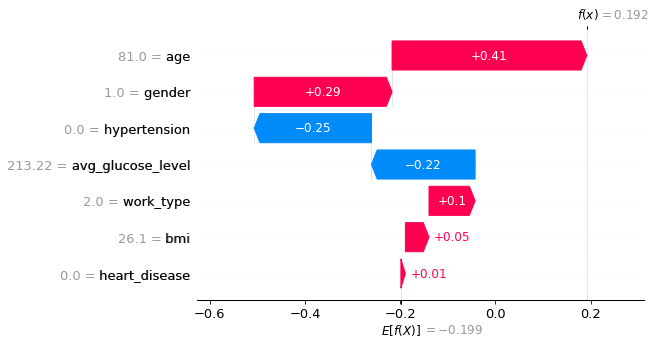

In [36]:
#SHAP plot for True Positive
class ShapInput(object):
    def __init__(self, expectation, shap_values, features, feat_names):
        self.base_values = expectation
        self.values = shap_values
        self.data = features
        self.display_data = features
        self.feature_names = feat_names

shap_input = ShapInput(explainer.expected_value[1], shap_values[1][148],
                       (X_test.loc[148].astype(str)),
                       feat_names=X.columns)



shap.waterfall_plot(shap_input)

<font size = 4 color = '#008B8B'> <b>Key Insights </b> </font>

A waterfall plot is a powerful visual tool that shows why a case receives a specific prediction based on its variable values. The plot starts at the bottom and builds up the prediction step by step by either adding (represented in red) or subtracting (represented in blue) values.

The graph above demonstrates how this works for an individual in the X_test dataset who was classified as a True Positive case. The base value at the bottom of the plot is -0.192, which is the average of all observations. As the plot progresses, values are added or subtracted until the final prediction of 0.14 is reached at the top of the plot.

In [37]:
#Break Down interaction plot for a True Positive case(Stroke ==1 and predicted ==1) 
start_time = datetime.now()
print("Start Time: {}" .format(start_time))

exp.predict_parts(X_test.iloc[148, :],type='break_down_interactions').plot() #1007

end_time = datetime.now() 
print("End Time: {}" .format(end_time))
print('Total time taken:' + '\033[1m' + str(end_time - start_time) + '\033[0m')

Start Time: 2023-02-03 14:20:51.983548


End Time: 2023-02-03 14:20:53.447372
Total time taken:0:00:01.463824


<font size = 4 color = '#008B8B'> <b>Key Insights </b> </font>

The mean prediction for the LightGBM model for the stroke prediction dataset is 26.7%. This value represents the average predicted probability of stroke over all individuals in the dataset. It is important to note that this is not the percentage of individuals who actually had a stroke, but rather the average model prediction.

For a specific individual, the model's prediction is 83%, which is much higher than the mean prediction. The explanatory variable that has the largest impact on this prediction is age. By holding the value of this variable constant, the mean prediction is increased by 46 percentage points. The effect of all other explanatory variables is smaller in comparison.

### Summary comparison 

| About                                   | SHAP waterfall Plot                                                                                                                                                                                                                                                                                                                                                                                                                     | Breakdown interaction Plot                                                                                                                                                                                                                                                                                                                                                                                          |
|:----------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| üö© Method        | 1. SHAP averages across all possible combinations of variable contributions.    <br> 2.  Shows additive local representation                                                                                                                                                                                                                                                                                                                                                    | 1. Is greedy and only takes into account one set of nested conditionings.  <br> 2. Captures local interactions and generate non-additive explanations                                                                                                                                                                                                                                                                                                        |
| ‚è∞ Run Time for dataset used | 1-2 seconds for this dataset, 4-5 sec for dataset with 54 features                                                                                                                                                                                                                                                                                                                                                                                                                      | 2-3 seconds for this dataset, <b>20 - 25 mins</b> for dataset with 54 features                                                                                                                                                                                                                                                                                                                                                                                            |
| ‚úîÔ∏è  Packages             | SHAP, Dalex, Shapash, explainerdashboard, AIX360,Alibi Explain                                                                                                                                                                                                                                                                                                                                                                       | Dalex                                                                                                                                                                                                                                                                                                                                                                                                    |
| ‚≠ê  Advantages                      | 1. Quick to generate. <br> 2. The method has got a strong formal foundation derived from the cooperative games theory. <br> 3. Wide sources of documentation and explanation. <br>4.  Available in both Python and R <br> 5. Works with  Different Explainers -TreeExplainer, DeepExplainer and KernelExplainer <br > 6. It considers all possible conditioning  | 1. Intituative , easy to understand and interactive plots <br>  2. Available in both R and Python <br> 3. Are compact; results for many explanatory variables can be presented in a limited space. <br> 4. an be applied to any predictive model <br> 5. It captures  feature interaction                                                                |
| üí•  Limitation                       | 1. Not as intituative as  breakdown <br> 2. Multicollinearity Issue: If there are variables with high degree of multicollinearity, the SHAP values would be high for one of the variables and zero/very low for the other. <br> 3. It generates matplotlib based plots which are not interactive. <br> 4. For large models, the calculation of Shapley values is time-consuming                                                      | 1. Only suitable for small dataset due to high run time <br> 2.  Less documentation and references <br>   3. It consider only  a single series of nested conditionings <br> 4. does  not work well for models with heavy components related to interactions between features.  |

<font size = 4 color = '#008B8B'> Recommendation </font>
  - Breakdown interaction plot are more intuitive and probably suitable for small datasets with less sparsity and size for now due to its heavy computation run time.
  - SHAP has strong foundation and widely used as compared to break down. Hence, easier to research and implement.
  

[back](#Table-of-Contents)

<hr color='#008B8B'>

# Conclusion

1. Partial Dependence Plot (PDP) vs Accumulated Local Effects (ALE)
      - ALE appears to have  a competitive edge over PD because it addresses the bias that arises in PD when the feature of interest is highly correlated with other features
      - The runtime for both methods is similar. 

<br>

2. SHAP waterfall plot vs Breakdown plot  
    - SHAP is faster in terms of computation time.
    - However, the Breakdown plot is more intuitive and easier to understand.
    - Both methods have limitations, and it may be necessary to consider the specific use case and requirements before choosing one over the other.

<br>

3. Suggestions  
    - ALE can be explored further given its advantages over PDP. 
    - SHAP shows additive local represenation(complex models are usually non-additive). Break Down capture local interactions and generate non-additive explanations.
    - Currently, Breakdown may be more suitable for smaller datasets with less sparsity and size, due to its heavy computational runtime.

    


[back](#Table-of-Contents)

<hr color='#008B8B'>

# References

1. https://christophm.github.io/interpretable-ml-book/

2. https://www.darpa.mil/program/explainable-artificial-intelligence

3. https://www.forbes.com/sites/cognitiveworld/2019/07/23/understanding-explainable-ai/?sh=3c062d987c9e

4. https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

5. https://www.youtube.com/watch?v=u7Om2joZWYs

6. https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30

7. https://www.sciencedirect.com/science/article/pii/S0740624X21001027

8. https://christophm.github.io/interpretable-ml-book/ale.html

9. https://towardsdatascience.com/explainable-ai-xai-methods-part-3-accumulated-local-effects-ale-cf6ba3387fde

10. https://docs.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/mlx/accumulated_local_effects.html

11. https://towardsdatascience.com/partial-dependence-plots-with-scikit-learn-966ace4864fc

12. https://towardsdatascience.com/explainable-ai-xai-methods-part-1-partial-dependence-plot-pdp-349441901a3d

13. https://shap.readthedocs.io/en/latest/index.html

14. https://ema.drwhy.ai/breakDown.html

15. https://medium.com/responsibleml/basic-xai-with-dalex-part-4-break-down-method-2cd4de43abdd

16. https://uc-r.github.io/dalex

17. https://arxiv.org/abs/1903.11420


<hr color='#008B8B'>